In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_trade(win_prob, avg_win, avg_loss):
    """Simulate a single trade."""
    if np.random.rand() < win_prob:
        return avg_win
    else:
        return -avg_loss

def simulate_trading_strategy(initial_capital, trades, win_prob, avg_win, avg_loss):
    """Simulate the entire trading strategy."""
    capital = initial_capital
    capital_history = [capital]
    for _ in range(trades):
        capital += simulate_trade(win_prob, avg_win, avg_loss)
        capital_history.append(capital)
        if capital <= 0:  # Check for ruin during simulation
            break
    return capital_history

def calculate_risk_of_ruin(initial_capital, trades, win_prob, avg_win, avg_loss, simulations=1000):
    """Calculate the risk of ruin."""
    ruin_count = 0
    for _ in range(simulations):
        capital_history = simulate_trading_strategy(initial_capital, trades, win_prob, avg_win, avg_loss)
        if min(capital_history) <= 0:
            ruin_count += 1
    return ruin_count / simulations

In [2]:
initial_capital = 10000  # Starting capital of $10,000
average_win = 110       # Average winning trade profit of $110
average_loss = 100      # Average losing trade loss of $100
trades = 1000           # Number of trades in each simulation

In [3]:
risk_of_ruins = []
win_probabilities = np.arange(0.30, 0.60, 0.01)  # Win probabilities from 30% to 59%
for win_prob in win_probabilities:
    risk_of_ruin = calculate_risk_of_ruin(initial_capital, trades, win_prob, average_win, average_loss)
    risk_of_ruins.append(risk_of_ruin)

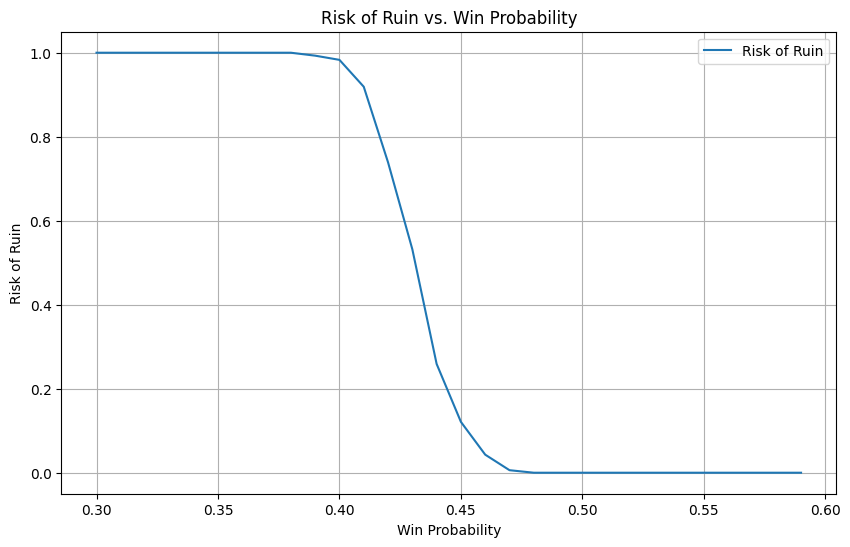

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(win_probabilities, risk_of_ruins, label='Risk of Ruin')
plt.xlabel('Win Probability')
plt.ylabel('Risk of Ruin')
plt.title('Risk of Ruin vs. Win Probability')
plt.grid(True)
plt.legend()
plt.show()